# import necessary library

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [2]:
df = pd.read_csv('Restaurant-Reviews.tsv', sep='\t', quoting=3)

# exploratory data analysis

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [6]:
print(len(df))
print(len(df[df['Liked'] == 1]))

1000
500


# data cleaning

In [7]:
import re
import nltk

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yandiher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords

In [10]:
df['Review'][0]

'Wow... Loved this place.'

In [11]:
review = re.sub(pattern='[^a-zA-Z]',
                repl=' ',
                string=df['Review'][0]).lower().split()

In [12]:
preview = []
for word in review:
    if word not in stopwords.words('english'):
        preview.append(word)
print(preview)
print(review)

['wow', 'loved', 'place']
['wow', 'loved', 'this', 'place']


In [13]:
review = [word for word in review if word not in stopwords.words(fileids='english')]

In [14]:
from nltk.stem import PorterStemmer
pStemmer = PorterStemmer()

In [15]:
review = [pStemmer.stem(word=word) for word in review]

In [16]:
review = ' '.join(review)
review

'wow love place'

# bags of word model

In [17]:
corpus = []
for i in range (len(df)):
    review = re.sub(pattern='[^a-zA-Z]',
                    repl=' ',
                    string=df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [pStemmer.stem(word) for word in review if word not in stopwords.words(fileids='english')]
    review = ' '.join(review)

    corpus.append(review)

In [18]:
print(corpus[6])
print(df['Review'].iloc[6])

honeslti tast fresh
Honeslty it didn't taste THAT fresh.)


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(corpus)

CountVectorizer()

In [20]:
x = vectorizer.transform(corpus).toarray()
y = df['Liked'].values

# split data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

# build algorithm

In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)

# evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [25]:
print('the accuracy of the model is ', accuracy_score(y_true=yTest, y_pred=prediction))
print(classification_report(y_true=yTest, y_pred=prediction))

the accuracy of the model is  0.77
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       100
           1       0.75      0.81      0.78       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



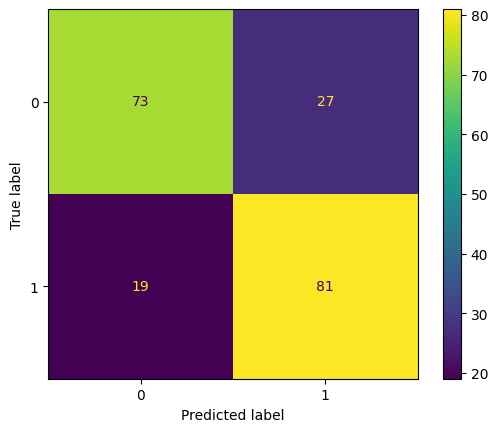

In [26]:
ConfusionMatrixDisplay.from_predictions(y_true=yTest, y_pred=prediction)
plt.show()

In [29]:
test = ['how is it possible that there was a cockroach inside my meal?']

In [30]:
test = vectorizer.transform(test).toarray()
test = model.predict(test)
if test == 1:
    print('the customer(s) love our restaurant.')
else:
    print('the customer(s) do not like our restaurant.')

the customer(s) do not like our restaurant.
